In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
from matplotlib import transforms
import pandas as pd
import numpy as np
import boost_histogram as bh

In [2]:
# create boost histogram

v1 = np.random.normal(size=(2, 100_000), scale=0.35)
hist = bh.Histogram(
    bh.axis.Regular(20, -1, 1, metadata="x"),
    bh.axis.Regular(20, -1, 1, metadata="y")
)
hist.fill(*v1)
# pd.DataFrame(hist.to_numpy()[0])
# print(hist.view())
# list(hist.axes.edges[0])

Histogram(
  Regular(20, -1, 1, metadata='x'),
  Regular(20, -1, 1, metadata='y'),
  storage=Double()) # Sum: 99111.0 (100000.0 with flow)

In [3]:
from plot_classes import EmptyPlot


class PythProjection(EmptyPlot):
    
    
    def __init__(self, figtitle=None, **kwargs):
        
        # self.config_rcParams({"axes.titlesize": 'xx-small'
        # }) # rc params dont work for some reason...
        
        super().__init__(layout=(2,2), **kwargs)
        self.create_canvas()
        self.make_grid(hspace=0.02, wspace=0.02, height_ratios=[1,4], width_ratios=[4,1])
        self.main_ax = self.make_subplot(1, 2, 0, 1)
        self.h_ax = self.make_subplot(0, 1, 0, 1)
        self.v_ax = self.make_subplot(1, 2, 1, 2)
        self.set_color() # set default colormap
        self.mainax_fsize = 12
        
        # self.titledict = {"mainx" : '', # x label of main plot
        #                   "mainy" : '', # y label of main plot
        #                   "topy"  : '', # y label of hotizontal projection plot
        #                   "rightx": ''  # x label of verical projection plot
        # }

        
    def fill(self, bh_obj):
        
        self.container2d.append(bh_obj)
        self.store_data()
        
        
    def store_data(self):
        
        self.bh_data = self.container2d[0]
        self.pd_data = pd.DataFrame(self.bh_data.to_numpy()[0])
        self.xsum = self.pd_data.sum(axis=0).to_list()
        self.ysum = self.pd_data.sum(axis=1).to_list()
        self.edges = [x for [x] in [list(self.bh_data.axes.edges[0][i]) for i in range(len(self.bh_data.axes.edges[0]))]]
        
        
    def projection_plot(self):
        
        hep.hist2dplot(self.bh_data, ax=self.main_ax, cbar=False)
        hep.histplot(self.xsum, bins=np.linspace(-1, 1, 21), ax=self.h_ax, color='k', zorder=3)
        hep.histplot(self.ysum, bins=np.linspace(-1, 1, 21), ax=self.v_ax, color='k', zorder=3, orientation='horizontal')
        
        # main plot
        _range = np.arange(self.edges[0], self.edges[-1]+0.5, 0.5)
        label_list = [f"{x:.1f}" for x in _range]
        self.main_ax.set_xticks(_range)
        self.main_ax.set_xticklabels(label_list, fontsize=self.mainax_fsize)
        self.main_ax.xaxis.label.set_fontsize(10)
        self.main_ax.set_yticks(_range)
        self.main_ax.set_yticklabels(label_list, fontsize=self.mainax_fsize)

        # modify horizontal plot
        self.set_h_ax()
        
        # modify vertical plot
        self.set_v_ax()
        
        
    def set_axis_fontsize(self, value):
        # this is the only way since modifying rcParams doesnt work...
        self.mainax_fsize = value

        
    def set_h_ax(self, **hax_kw):
        
        self.hax_kw = {"axis"       :'x',
                       "labelbottom": False,
                       "labelsize"  : 5
        }
        self.hax_kw.update(hax_kw)
                
        self.h_ax.set_xlim(-1, 1)
        self.h_ax.tick_params(**self.hax_kw)
        self.h_ax.grid(which='both', zorder=0, alpha=0.5)
        self.h_ax.set_axisbelow(True)
        
        
    def set_v_ax(self, **vax_kw):
        
        self.vax_kw = {"axis"     :'y',
                       "labelleft": False,
                       "labelsize": 5
        }
        self.vax_kw.update(vax_kw)
                
        self.v_ax.set_ylim(-1, 1)
        self.v_ax.tick_params(**self.vax_kw)
        self.v_ax.grid(which='both', zorder=0, alpha=0.5)
        self.v_ax.set_axisbelow(True)
        
        
    def axes_labels(self, **title_dict):
        
        if isinstance(title_dict, dict):
            self.titledict.update(title_dict)
            
        self.main_ax.set_xlabel(self.titledict["mainx"])
        self.main_ax.set_ylabel(self.titledict["mainy"])
        self.h_ax.set_ylabel(self.titledict["topy"])
        self.v_ax.set_xlabel(self.titledict["rightx"])
        
        
    def display(self):
        self.projection_plot()
        # self.fig.set_tight_layout(True) # tightlayout might be useful?


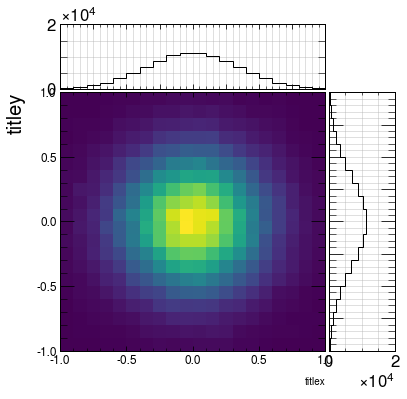

In [4]:
plot = PythProjection(size=(6,6))
plot.fill(hist)
# plot.set_axis_fontsize(12)
plot.axes_labels(mainy='titley', mainx='titlex')
# mpl.rc("axes", titlesize=1)
plot.display()